# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
### YOUR CODE HERE ###

#Загрузка необходимых библиотек.
import pandas as pd
import numpy as np

In [2]:
#Загружаем датасет в датафрейм, с проверкой пропущенных значений.
df_telecom_users = pd.read_csv('telecom_users.csv', index_col=0, na_values=' ')
df_telecom_users.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [3]:
#Проверяем, насколько правильно определились типы полей.
display(df_telecom_users.dtypes)
print('-------------------------------------------')
#Проверка пропущенных значений.
display(df_telecom_users.isnull().sum())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

-------------------------------------------


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

Типы полей определились правильно. Пропущенные данные есть только в одной колонке.

In [4]:
#Выясним, с чем связаны пропуски.
df_telecom_users[df_telecom_users.TotalCharges.isnull()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No


Пропуски связаны с нулевыми занчениями в поле "tenure".

In [5]:
#Заполним na-значения произведением tenure и MonthlyCharges, после чего, проверим корректность результата.
df_telecom_users.TotalCharges.fillna(df_telecom_users.tenure*df_telecom_users.MonthlyCharges, inplace=True)
display(df_telecom_users[df_telecom_users.customerID == '2775-SEFEE'])
print(f'\nКоличество пропусков в поле TotalCharges: {df_telecom_users.TotalCharges.isnull().sum()}')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.9,0.0,No



Количество пропусков в поле TotalCharges: 0


In [6]:
#Вычислим основные статистические значения для загруженных данных.
display(df_telecom_users.describe(include=np.object))
display(df_telecom_users.describe(include=np.number))
print(f'\nКоличество пенсионеров: {df_telecom_users.SeniorCitizen.sum()}')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,5845-BZZIB,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000



Количество пенсионеров: 966


# 2. Исследование зависимостей и формулирование гипотез

In [7]:
### YOUR CODE HERE ###

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Подготовим датафрейм для исследования зависимостей.
df_for_corr = df_telecom_users.drop('customerID', axis=1)

for_map = {'Male': 0,
          'Female': 1,
          'No': 0,
          'Yes': 1,
          'No phone service': 2,
          'No internet service': 2,
          'Fiber optic': 1,
          'DSL': 2,
          'Month-to-month': 0,
          'One year': 1,
          'Two year': 2,
          'Electronic check': 0,
          'Mailed check': 1,
          'Bank transfer (automatic)': 2,
          'Credit card (automatic)': 3}

df_for_corr = df_for_corr.replace(for_map)
df_for_corr.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,0,0,1,1,72,1,1,0,2,2,2,2,2,2,2,0,3,24.10,1734.65,0
4528,1,0,0,0,44,1,0,1,0,1,1,0,1,0,0,1,3,88.15,3973.20,0
6344,1,1,1,0,38,1,1,1,0,0,0,0,0,0,0,1,2,74.95,2869.85,1
6739,0,0,0,0,4,1,0,2,0,0,0,0,0,1,0,1,0,55.90,238.50,0
432,0,0,0,0,2,1,0,2,1,0,1,0,0,0,0,0,0,53.45,119.50,0


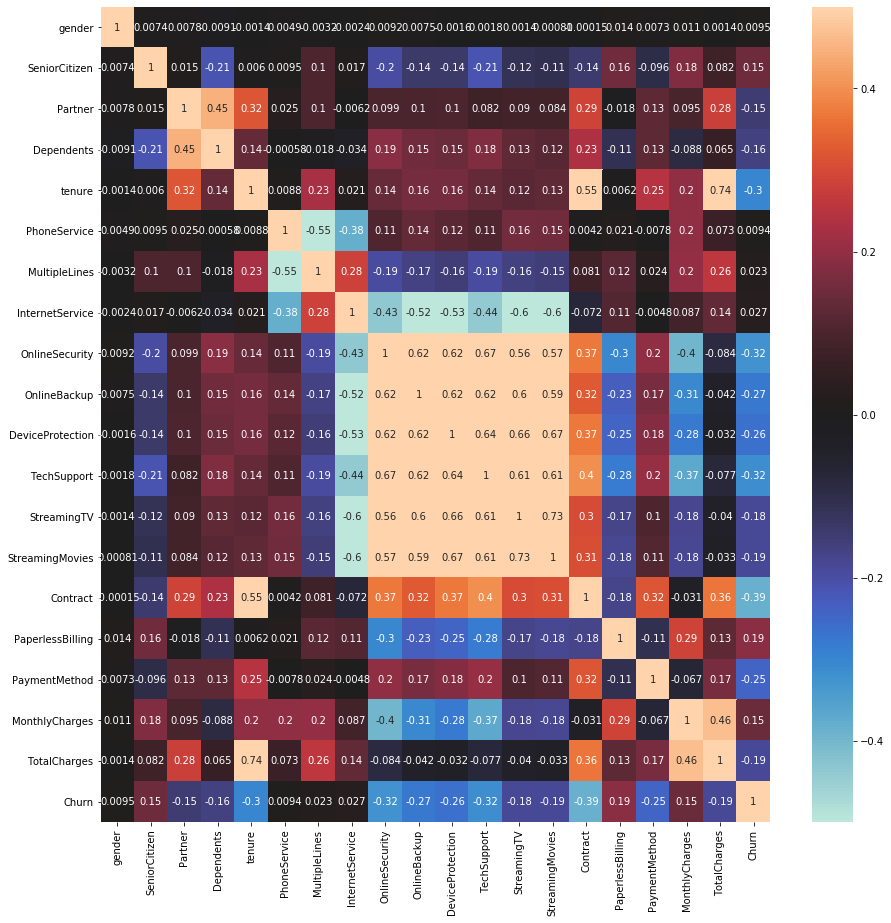

In [9]:
#Вычислим корреляционную матрицу по методу Кендалла, т.к. для работы с количественными и ранговыми данными лучше использовать
#ранговый коэффициент корреляции Кендалла.
corr_matrx = df_for_corr.corr(method='kendall')

plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrx, center=0, annot=True, vmin=-0.5, vmax=0.5, robust=True)
plt.show()

Можно выдвинуть гипотезу, что значения, имеющие заметную корреляцию, дадут лучший результат при вычислении прогноза оттока, чем значения, не имеющие её.

In [10]:
#Воспользуемся шкалой Чеддока и заполним множество, в котором соберём названия полей, имеющие коэффициент корреляции от
#"Заметного" и выше.
hypo_matrx = corr_matrx[((corr_matrx > 0.5) | (corr_matrx < -0.5)) & (corr_matrx != 1)].dropna(how='all', axis=0)\
             .dropna(how='all', axis=1)
hypo_set = set()
hypo_set.update(hypo_matrx.index.values)
hypo_set.update(hypo_matrx.columns.values)
hypo_set

{'Contract',
 'DeviceProtection',
 'InternetService',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PhoneService',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'TotalCharges',
 'tenure'}

# 3. Построение моделей для прогнозирования оттока

In [11]:
### YOUR CODE HERE ###

#Загрузим нужные библитеки, в том числе, содержащие алгоритмы, наилучшим образом зарекомендовавшие себя, в задачах бинарной
#классификации.
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold,
                                     cross_val_predict)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import warnings

In [20]:
#Напишем функцию для вычисления прогноза, в том чиле, использующую приём stacking.
def stacking(models, meta_alg, data, targets, cv=5, random_state=17, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=test_size, random_state=random_state)
    train, valid, train_true, valid_true = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)
    
    ras_list = []
    meta_mtrx = np.empty((valid_true.shape[0], len(models)-1))
    for n, model in enumerate(models):
        #Обучаем модели
        model.fit(train, train_true)
        print(f'{model.estimator.__class__.__name__}: {model.best_params_}')
        #Заполняем мета-матрицу для stacking, без самостоятельного XGBClassifier.
        if n != len(models)-1:
            meta_mtrx[:, n] = model.predict(valid)
    print('Мета-матрица расчитана')
        
    meta_model = meta_alg.fit(meta_mtrx, valid_true)
    print(f'{meta_model.estimator.__class__.__name__}: {meta_model.best_params_}')
        
    meta_mtrx_test = np.empty((y_test.shape[0], len(models)-1))
    for n, model in enumerate(models):
        #Заполняем тестовую мета-матрицу для stacking, без самостоятельного XGBClassifier.
        if n != len(models)-1:
            meta_mtrx_test[:, n] = cross_val_predict(model, X_test, y_test, cv=cv, method='predict', n_jobs=-1)
        #Вычисляем AUC-ROC для моделей без stacking.
        ras_list.append(roc_auc_score(y_test, model.predict(X_test)))
    print('Тестовая мета-матрица расчитана')
        
    meta_predict = meta_alg.predict(meta_mtrx_test)
    print('Прогнозы расчитаны\n')

    return meta_predict, y_test, ras_list

In [13]:
# Зададим параметры базовых алгоритмов для GridSearch.
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

lsvc_params = {'C': np.arange(0.1, 1, 0.2)} # LinearSVC

lr_params = {'C': np.arange(0.5, 1, 0.1)} # LogisticRegression

# параметры мета-алгоритма
xgb_params = {'n_estimators': range(10, 100, 5), # XGBClassifier
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [14]:
#Разделим датафрейм на признаки и целевую переменную.
X_hypo = df_for_corr[hypo_set]
X = df_for_corr.drop('Churn', axis=1)
y = df_for_corr.Churn

In [15]:
#Настроим модели для вычисления прогноза и составим список моделей для передачи в функцию. Ради эксперимента, я добавил в
#список моделей алгоритм XGBoost, который в stacking участвовать не будет.
gbc_gscv = GridSearchCV(GradientBoostingClassifier(random_state=17), gbc_params, cv=skf, n_jobs=-1)
rfc_gscv = GridSearchCV(RandomForestClassifier(random_state=17), rfc_params, cv=skf, n_jobs=-1)
lsvc_gscv = GridSearchCV(LinearSVC(random_state=17, max_iter=100000, tol=1e-03), lsvc_params, cv=skf, n_jobs=-1)
lr_gscv = GridSearchCV(LogisticRegression(random_state=17, solver='saga', max_iter=4000), lr_params, cv=skf, n_jobs=-1)
#Используем XGBClassifier, как отдельный алгоритм
xgb_gscv = GridSearchCV(XGBClassifier(random_state=17), xgb_params, cv=skf, n_jobs=-1)
#Используем XGBClassifier, как мета-алгоритм для stacking
xgb_gscv_st = GridSearchCV(XGBClassifier(random_state=17), xgb_params, cv=skf, n_jobs=-1)

models = [gbc_gscv, rfc_gscv, lsvc_gscv, lr_gscv, xgb_gscv]

In [21]:
#Т.к. алгоритм LinearSVC не всегда сходится за, указанное, максимальное количество итераций, чтобы не засорять
#экран - отключим уведомления.
warnings.filterwarnings('ignore')

In [22]:
#Вычислим прогноз и наилучшие параметры моделей для гипотезы.
%%time

hypo_pred, hypo_y_test, hypo_ras_list = stacking(models, xgb_gscv_st, X_hypo, y)

GradientBoostingClassifier: {'learning_rate': 0.2}
RandomForestClassifier: {'min_samples_leaf': 4, 'n_estimators': 60}
LinearSVC: {'C': 0.30000000000000004}
LogisticRegression: {'C': 0.5}
XGBClassifier: {'eta': 0.1, 'min_child_weight': 3, 'n_estimators': 60, 'subsample': 0.5000000000000001}
Мета-матрица расчитана
XGBClassifier: {'eta': 0.9, 'min_child_weight': 2, 'n_estimators': 10, 'subsample': 0.1}
Тестовая мета-матрица расчитана
Прогнозы расчитаны

Wall time: 28min 35s


In [23]:
#Вычислим прогноз и наилучшие параметры моделей для полного набора данных.
%%time

pred, y_test, ras_list = stacking(models, xgb_gscv_st, X, y)

GradientBoostingClassifier: {'learning_rate': 0.1}
RandomForestClassifier: {'min_samples_leaf': 4, 'n_estimators': 70}
LinearSVC: {'C': 0.7000000000000001}
LogisticRegression: {'C': 0.5}
XGBClassifier: {'eta': 0.1, 'min_child_weight': 5, 'n_estimators': 55, 'subsample': 0.1}
Мета-матрица расчитана
XGBClassifier: {'eta': 0.6, 'min_child_weight': 2, 'n_estimators': 80, 'subsample': 0.1}
Тестовая мета-матрица расчитана
Прогнозы расчитаны

Wall time: 35min 2s


# 4. Сравнение качества моделей 

In [24]:
### YOUR CODE HERE ###

#Эффективность моделей проверим с помощью метрики AUC-ROC, т.к. эта метрика наилучшим образом отражает соотношение между
#"точностью" и "полнотой".
print('Гипотеза:')
for model, ras in zip(models, hypo_ras_list):
    print(f'\tAUC-ROC для {model.estimator.__class__.__name__}: {ras}')
    
print(f'\n\tAUC-ROC для stacking: {roc_auc_score(hypo_y_test, hypo_pred)}\n')

print('Полный набор:')
for model, ras in zip(models, ras_list):
    print(f'\tAUC-ROC для {model.estimator.__class__.__name__}: {ras}')
    
print(f'\n\tAUC-ROC для stacking: {roc_auc_score(y_test, pred)}')

Гипотеза:
	AUC-ROC для GradientBoostingClassifier: 0.7066247281764524
	AUC-ROC для RandomForestClassifier: 0.7016607124365745
	AUC-ROC для LinearSVC: 0.6781609195402298
	AUC-ROC для LogisticRegression: 0.5
	AUC-ROC для XGBClassifier: 0.697580123226675

	AUC-ROC для stacking: 0.677737004245625

Полный набор:
	AUC-ROC для GradientBoostingClassifier: 0.6993243243243243
	AUC-ROC для RandomForestClassifier: 0.6866359894377136
	AUC-ROC для LinearSVC: 0.6196282489385938
	AUC-ROC для LogisticRegression: 0.6887296779538158
	AUC-ROC для XGBClassifier: 0.6980169824997412

	AUC-ROC для stacking: 0.6553503934969452


В целом, наша гипотеза подтвердилась - коррелирующие между собой данные, дают лучший прогноз.  
  
В нашем случае наилучшая метрика оказалась у алгоритма GradientBoostingClassifier в связке с GreadSearch.